
# Proyecto: Reconocimiento de Números y Operadores Matemáticos

Estos notebooks desarrolla un sistema interactivo en **Streamlit** para el reconocimiento de números y operadores matemáticos, utilizando modelos de clasificación como **Regresión Logística, k-Vecinos y SVM**.

## Pasos desarrollados:

### 1. Importación de Librerías
Se cargan las bibliotecas necesarias para procesamiento de imágenes, modelos de aprendizaje automático y visualización.

### 2. Creación del Dataset
Se genera un dataset de imágenes con los números del **0 al 9** y operadores **(+, -, ×, /)**.

### 3. Preprocesamiento de Datos
Se convierten las imágenes a escala de grises y se normalizan para mejorar el rendimiento de los modelos.

### 4. Entrenamiento de Modelos de Clasificación
Se comparan los siguientes modelos:
- **Regresión Logística**
- **k-Vecinos Cercanos (k-NN)**
- **Máquinas de Soporte Vectorial (SVM)**

El modelo con mejor rendimiento es seleccionado para su uso en la aplicación.

### 5. Desarrollo de la Aplicación en Streamlit
Se crea una interfaz gráfica donde los usuarios pueden dibujar números y operadores, y la aplicación reconocerá los símbolos, ejecutará la operación matemática y mostrará el resultado.

### 6. Pruebas y Evaluación
Se realizan pruebas para verificar la precisión del modelo en la clasificación y la correcta ejecución de las operaciones matemáticas.



# __Tarea 2:__ 

1. Nombre: Juan Luis   
1. Apellido: Fernández Abreu
1. Correo: juuanfz@gmail.com

Se dividirá en 2 Notebooks: Notebook1_Num para el dataset de MNIST y Notebook2_Op para el dataset propio de operadores

# Comparación de Modelos de Clasificación para Operadores (+ - * x / ÷)
En este notebook, vamos a comparar tres modelos de clasificación:
- **Regresión Logística**
- **k-Vecinos Cercanos (KNN)**
- **Máquinas de Soporte Vectorial (SVM)**

Utilizaremos el conjunto de datos generado por los estudiantes del curso en github donde cada uno aportó imágenes para llenar este dataset : **https://github.com/HandlessCoder/Dataset_Operadores_28x28** que contiene imágenes de operadores escritos a mano.

Cargar imágenes

In [1]:
import os
import cv2
import numpy as np
import random

# Definir la semilla
SEED = 28447019
np.random.seed(SEED)
random.seed(SEED)

# Ruta del repositorio clonado
repo_path = "../models/input/Dataset_Operadores_28x28"

# Diccionario para almacenar imágenes por operador
imagenes_operadores = {}

# Iterar sobre las carpetas de operadores
for operador in os.listdir(repo_path):
    operador_path = os.path.join(repo_path, operador)
    
    if os.path.isdir(operador_path):  # Asegurar que sea una carpeta
        imagenes_operadores[operador] = []
        
        for img_file in os.listdir(operador_path):
            img_path = os.path.join(operador_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
            if img is not None:
                imagenes_operadores[operador].append(img)

print("Imágenes cargadas exitosamente.")


Imágenes cargadas exitosamente.


Creamos el conjunto de datos de imágenes correctamente al redimensionar y aplanar cada imagen en imagenes_operadores y asignando la etiqueta correspondiente ( a cada operador)

In [2]:

X = []
y = []

for operador, imagenes in imagenes_operadores.items():
    for img in imagenes:
        img_resized = cv2.resize(img, (28, 28))  # Redimensionar si es necesario
        X.append(img_resized.flatten())  # Aplanar la imagen
        y.append(operador)  # Etiqueta (el operador)

X = np.array(X)
y = np.array(y)

print(f"Dataset creado con {len(X)} imágenes.")


Dataset creado con 876 imágenes.


In [3]:
from sklearn.preprocessing import LabelEncoder

# Convertir las etiquetas (y) a valores numéricos

# Convertir etiquetas a números
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Ahora y_encoded tiene valores numéricos

# Guardar el mapeo para su uso posterior
operator_classes = label_encoder.classes_

print("Clases asignadas:", operator_classes)


Clases asignadas: ['Division1' 'Division2' 'Multiplicacion1' 'Multiplicacion2' 'Resta'
 'Suma']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# División en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=SEED)

# Aplicar StandardScaler después de dividir los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")



Tamaño del conjunto de entrenamiento: 700
Tamaño del conjunto de prueba: 176



###  Pruebas y Evaluación

Para medir el rendimiento de los modelos entrenados, se utilizaron las siguientes métricas:

- **Accuracy**: Porcentaje de predicciones correctas sobre el total.
- **Precision**: Proporción de predicciones positivas correctas.
- **Recall**: Proporción de casos positivos correctamente identificados.
- **F1-score**: Media armónica entre precisión y recall, útil en datasets desbalanceados.

El proceso de evaluación consistió en:

1. Entrenar cada modelo con el conjunto de datos.
2. Realizar predicciones sobre un conjunto de validación.
3. Calcular las métricas mencionadas.
4. Determinar el mejor modelo basado en el puntaje promedio.

El modelo con mejor desempeño se selecciona para su uso en la aplicación.


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo
model = RandomForestClassifier(n_estimators=100, random_state=SEED)
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")


Precisión del modelo: 92.05%


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Definir los modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "k-Vecinos (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (kernel=linear)": SVC(kernel="linear", probability=True)
}

# Diccionario para almacenar los resultados
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, average='macro') * 100
    recall = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100

    results[name] = [accuracy, precision, recall, f1]

# Convertir a DataFrame para fácil visualización
df_results = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])


# Mostrar la tabla de comparación
print("\n Comparación de métricas (%) entre modelos:")
display(df_results)



 Comparación de métricas (%) entre modelos:


,Regresión Logística,k-Vecinos (k=5),SVM (kernel=linear)
Accuracy,81.250000,81.250000,84.659091
Precision,82.123358,82.219497,85.453058
Recall,80.675927,81.123010,84.311287
F1-Score,80.759980,80.366578,84.295959


In [7]:
# Calcular el promedio de cada métrica para determinar el mejor modelo
average_scores = {name: np.mean(metrics)  for name, metrics in results.items()}  # Convertir a porcentaje

# Encontrar el mejor modelo basado en el puntaje promedio
best_model = max(average_scores, key=average_scores.get)

print("\n🏆 Mejor modelo general:", best_model)
print(f"Puntaje promedio de métricas: {average_scores[best_model]:.2f}%")



🏆 Mejor modelo general: SVM (kernel=linear)
Puntaje promedio de métricas: 84.68%


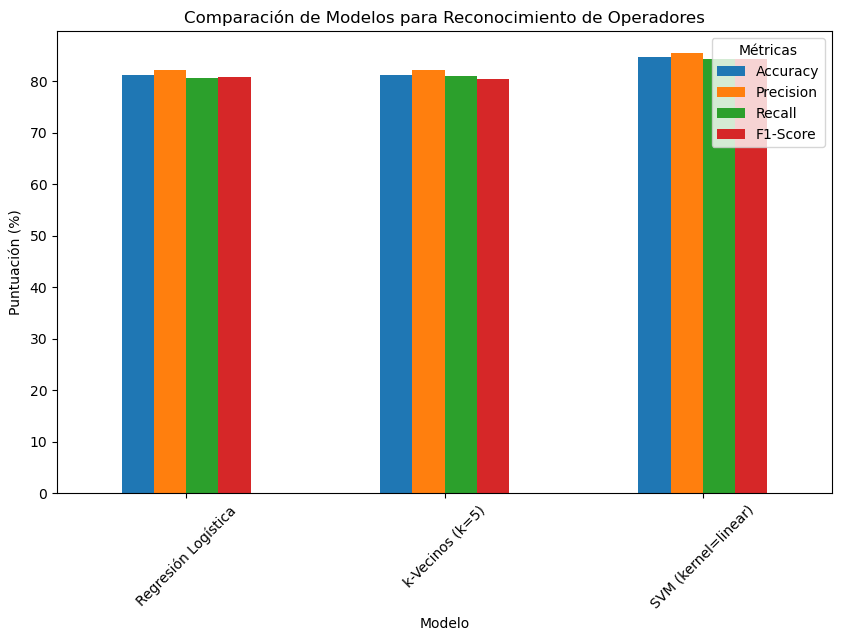

In [8]:
import matplotlib.pyplot as plt

df_results.T.plot(kind="bar", figsize=(10, 6))
plt.title("Comparación de Modelos para Reconocimiento de Operadores")
plt.xlabel("Modelo")
plt.ylabel("Puntuación (%)")
plt.xticks(rotation=45)
plt.legend(title="Métricas")
plt.show()


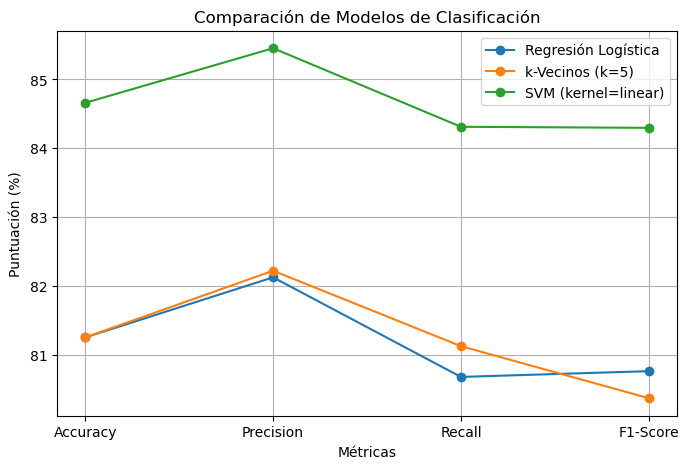

In [9]:
plt.figure(figsize=(8, 5))

# Convertir los índices del DataFrame en una lista para el eje X
metricas = list(df_results.index)

for model in df_results.columns:
    valores = df_results.loc[:, model].values  # Asegurar que es un array de valores
    plt.plot(metricas, valores, marker='o', linestyle='-', label=model)

# Configuración del gráfico
plt.xlabel("Métricas")
plt.ylabel("Puntuación (%)")
plt.title("Comparación de Modelos de Clasificación")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


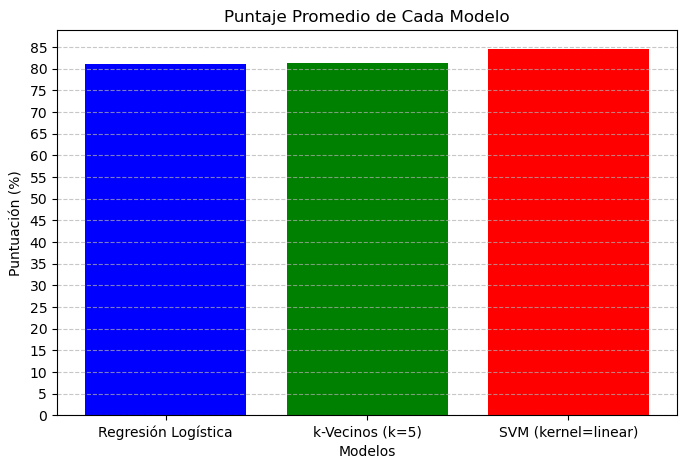

In [10]:
import matplotlib.pyplot as plt

# Gráfico de barras para la comparación del puntaje promedio
plt.figure(figsize=(8, 5))
plt.bar(average_scores.keys(), average_scores.values(), color=["blue", "green", "red"])
plt.title("Puntaje Promedio de Cada Modelo")
plt.ylabel("Puntuación (%)")
plt.xlabel("Modelos")
plt.xticks(rotation=0)

# Especificar más valores en el eje y
plt.yticks(range(0, 90, 5)) 

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

### Importaremos el mejor modelo en base a la métrica Accuracy

[0] = Accuracy, [1] Precision, [2] = Recall y [3] = F1-Score

In [11]:
import joblib
import os

carpeta_destino = "../notebooks" 

best_model_name = max(results, key=lambda k: results[k][1])  # Basado en Precision
best_model = models[best_model_name]

joblib.dump(best_model, os.path.join(carpeta_destino, "mejor_modelo_operadores.joblib"))
joblib.dump(label_encoder, os.path.join(carpeta_destino, "label_encoder_operadores.joblib"))

print(f"Mejor modelo guardado en: {carpeta_destino}/{best_model_name}") 




Mejor modelo guardado en: ../notebooks/SVM (kernel=linear)
